<font color='blue' size=6>Assignment  on Model Evaluation and Feature Selection</font>


***
#### Import libraries here you need to solve this Assignment:

In [612]:
import pandas as pd                                    # For using functions
import numpy as np                                     # For calculation purpose
import seaborn as sns                                  # For plotting graph
import matplotlib.pyplot as plt                        # For plotting graph
from sklearn.model_selection import train_test_split   # For splitting data into training set and testing set
from sklearn.preprocessing import MinMaxScaler         # For scaling the data (Normalized Scalling)
from sklearn.preprocessing import StandardScaler       # For Standard Scaling of the data
from sklearn.preprocessing import PolynomialFeatures   # Generating feature with less than or equal to the specified degree
from sklearn.linear_model import LinearRegression      # For Linear Regression
from sklearn.metrics import r2_score                   # For calculating r2 value
from sklearn.metrics import mean_squared_error         # For calculating mean square error
from sklearn.linear_model import Lasso                 # To use Lasso or L1 regularization
from sklearn.linear_model import Ridge                 # To use Ridge or L2 regularization
from sklearn.ensemble import RandomForestClassifier    # For Random Forest Classifier
from sklearn.svm import SVR                            # For Support vector regression, 
                                                       # examines the linear relationship between two continuous variables
from sklearn.feature_selection import RFE              # Recursive feature Elimination

# Load the dataset

In [676]:
df = pd.read_csv('Advertising_data1.csv') # Reading a csv file
df.head()   # Printing the data of csv file

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [679]:
df.describe()  # Printing statistical info of the data set

,TV,radio,newspaper,sales
count,78.000000,78.00000,78.000000,78.000000
mean,149.151282,24.54359,31.511538,14.464103
std,86.543707,14.45717,21.979258,5.257425
min,7.300000,1.40000,0.300000,4.800000
25%,69.050000,13.02500,16.075000,10.175000
50%,149.400000,25.15000,28.100000,13.300000
75%,218.000000,36.22500,43.275000,18.375000
max,293.600000,49.60000,114.000000,25.400000


In [680]:
df.info()   # Printing info about columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
TV           78 non-null float64
radio        78 non-null float64
newspaper    78 non-null float64
sales        78 non-null float64
dtypes: float64(4)
memory usage: 2.5 KB


In [681]:
df[df.isna().any(axis=1)]  # Checking for null or missing values in the data set

,TV,radio,newspaper,sales


In [682]:
df[df.duplicated()]    # Checking for duplicate values in the data set

,TV,radio,newspaper,sales


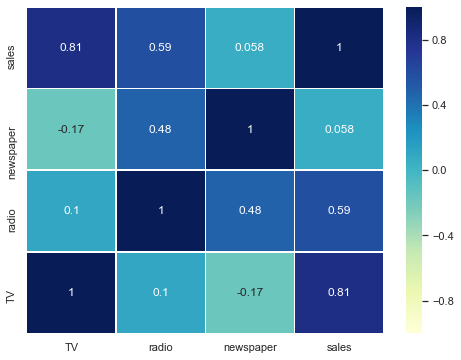

In [683]:
data_c = df.corr()   # Finding the correlation between feature
fig, axes = plt.subplots(figsize=(8,6))   # Setting figure size
ax = sns.heatmap(data_c, vmin = -1, vmax = 1, annot = True, ax = axes, cmap="YlGnBu", linewidth=0.5) # Heatmap of the dataset
ax.set_xlim(0,4)  # Setting xlimit
ax.set_ylim(0,4)  # Setting ylimit
plt.show()

# Assumptions

1. Data is continuous.
2. Target variable or dependent variable is 'sales'. 
3. Independent variables are 'TV', 'newspaper', 'radio'.
4. 'TV' and 'sales' has higgest correlation of 0.81 or 80% (correlation between dependent and independent variables).
5. 'newpaper' and 'sales' has lowest correlation of 0.058 or 5.8% (correlation between dependent and independent variables).
6. 'newspaper' and 'radio' has highest correlation of 0.48 or 48% (correlation between independent variables).
7. 'TV' and 'radio' has lowest coorelation of 0.1 or 10% (correlation between independent variables).
8. The data has no null/missing or dulpicate values. 

<a id='question10'></a>
<font color='red' size=5>Question</font>
- Generate 3 different models having your target variable and one independent variable every time. Comment whether the models are overfitting or underfitting. In both such scenarios, use appropriate methods to handle it (Hint : Use PolynomialFeatures from sklearn for underfitting and/or regularization for overfitting models.) If you are using regularization then you'll have to show/use both L1 and L2. Finally, submit your recommendations based on your experience/insights

In [684]:
df1 = df.filter(["TV","sales"]) # Data frame with Tv and sales

In [685]:
df2 = df.filter(["newspaper",'sales'])  # Data frame with newspaper and sales

In [686]:
df3 = df.filter(["radio","sales"])  # Data frame with radio and sales

# For data frame df1 with columns 'TV' and 'sales'

In [687]:
col1 = df1.columns  # Columns of the previous data set

In [688]:
temp_df1, test_df1 = train_test_split(df1, test_size = 0.2,random_state=1)   # Splitting data set into temporary and testing data set

In [689]:
train_df1, val_df1 = train_test_split(temp_df1, test_size = 0.25,random_state=1) # Using temporary data set for making training and cross validation set

In [690]:
print(train_df1.shape)  # Shape of training set
print(test_df1.shape)   # Shape of testing set
print(val_df1.shape)    # Shape of cross validation set

(46, 2)
(16, 2)
(16, 2)


In [691]:
scaler = StandardScaler()    # Standard scaling

For training set of df1

In [692]:
df1_train = scaler.fit_transform(train_df1)   # Scaling the training data set

In [693]:
df1_train = pd.DataFrame(df1_train, columns = col1)   # Making a data frame of the scaled data with previous columns name

In [694]:
df1_train.shape  # Shape of the data set

(46, 2)

In [695]:
df1_train.head()  # Printing first 5 values of the training data set

,TV,sales
0,0.888399,0.198084
1,0.909355,1.522715
2,-0.105871,0.097733
3,-1.251493,-0.825495
4,-0.005745,0.800189


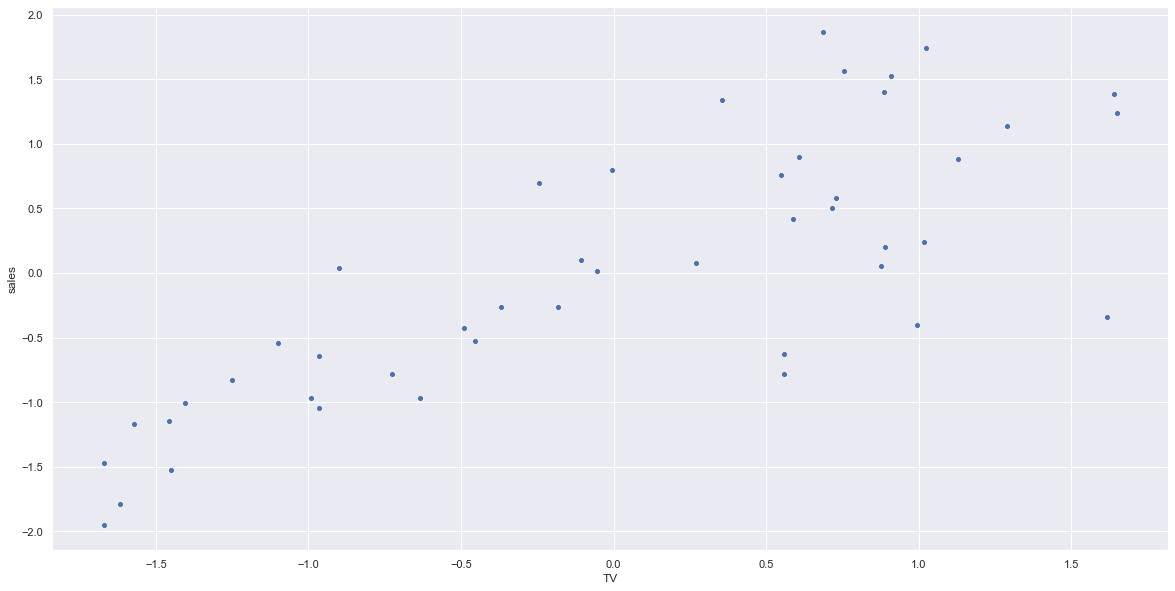

In [696]:
sns.scatterplot(data=df1_train,x='TV',y='sales') # Plotting the standard scaled data of df1

In [697]:
x1 = df1_train["TV"].values.reshape(-1,1)  # Reshaping the training set
y1 = df1_train["sales"]     # Saving data of sales in y1
reg = LinearRegression()    # Trainig model
reg.fit(x1,y1)                     # Linear regression of x1 and y1
y_pred1 = reg.predict(x1)          # Making prediction of x1
y_pred1 

array([ 0.70226022,  0.71882589, -0.08368863, -0.98927841, -0.00454155,
        0.56513332,  0.4399705 ,  0.78600887, -0.86963748,  0.4399705 ,
        1.3032258 , -0.50151155, -0.76196065, -1.27733694, -1.31875111,
        0.80349485,  0.69213676,  1.01884852, -0.29260009,  1.29678359,
        0.28167635, -0.76380128,  0.464819  ,  0.54120513,  0.4335283 ,
       -0.19228578,  0.57709741,  0.59642402, -0.71134333, -0.57329611,
       -1.31967142, -0.04319478,  0.89092476,  0.69949928, -1.15217413,
       -0.35978307,  1.27653667,  0.21265274, -0.14534972,  0.80901674,
       -1.14573192, -1.10891933, -0.38831283, -1.24328529,  0.47954404,
       -0.78312789])

In [698]:
# For training data set of df1

print("R2_score of Training set = ", r2_score(y1,y_pred1).round(2))    # Checking r2 score between actual and predicted
rss = np.sum(np.square(y1 - y_pred1))                 #  Residual sum of square 
print("Residual sum of square of Training set", rss.round(2))
mse = mean_squared_error(y1, y_pred1)   # Mean squared error
print("Mean square error of Training set", mse.round(2))
rmse = mse**0.5   # Root mean square error
print("Root Mean square error of Training set", rmse.round(2))

R2_score of Training set =  0.62
Residual sum of square of Training set 17.26
Mean square error of Training set 0.38
Root Mean square error of Training set 0.61


In [699]:
accuracy = reg.score(x1,y1).round(2) # Accuracy of the training data set
print("Accuracy of the training data set of df1:",accuracy*100,'%')

Accuracy of the training data set of df1: 62.0 %


For Cross-Validation set of df1

In [700]:
df1_val = scaler.fit_transform(val_df1)   # Scaling the cross validation data set 

In [701]:
df1_val = pd.DataFrame(df1_val, columns = col1)   # Making a data frame of the scaled data with previous columns name

In [702]:
df1_val.shape  # Shape of the cross validation data set

(16, 2)

In [703]:
df1_val.head() # Printing first 5 values of the data set

,TV,sales
0,0.889071,1.629071
1,1.439652,-0.333219
2,0.422556,0.610902
3,-0.935544,-0.758999
4,0.776586,-0.166610


In [704]:
# For cross validation data set of df1

x2 = df1_val['TV'].values.reshape(-1,1)  # Reshaping the data set
y2 = df1_val["sales"]     # Saving data of sales in y2
reg = LinearRegression()         
reg.fit(x2,y2)                     # Linear regression of x2 and y2
y_pred2 = reg.predict(x2)          # Making prediction of x2
y_pred2    # Printing prediction

array([ 0.69806411,  1.13035951,  0.3317751 , -0.73455356,  0.60974569,
        0.36710247, -1.09247555,  0.71665746, -0.41009959, -0.65739115,
       -0.01870956, -1.2458707 ,  1.302348  , -0.68342184, -0.8163643 ,
        0.50283392])

In [705]:
print("R2_score of Validation set = ", r2_score(y2,y_pred2).round(2))    # Checking r2 score between actual and predicted 
rss1 = np.sum(np.square(y2 - y_pred2))                 #  Residual sum of square 
print("Residual sum of square of Validation set =", rss.round(2))
mse1 = mean_squared_error(y2, y_pred2)   # Mean squared error
print("Mean square error of Validation set =", mse1.round(2))
rmse1 = mse1**0.5   # Root mean square error
print("Root Mean square error of Validation set =", rmse1.round(2))

R2_score of Validation set =  0.62
Residual sum of square of Validation set = 17.26
Mean square error of Validation set = 0.38
Root Mean square error of Validation set = 0.62


In [706]:
accuracy = reg.score(x2,y2).round(2) # Accuracy of cross validation data of df1
print("Accuracy of the cross validation data set of df1:",accuracy*100,'%')

Accuracy of the cross validation data set of df1: 62.0 %


For Testing set of df1

In [707]:
df1_test = scaler.fit_transform(test_df1)   # Scaling the test data set

In [708]:
df1_test = pd.DataFrame(df1_test, columns = col1)   # Making a data frame of the scaled data with previous columns name

In [709]:
df1_test.shape   # Shape of test data set

(16, 2)

In [710]:
df1_test.head()  # Printing first 5 values of the data set

,TV,sales
0,1.014970,0.694413
1,-0.324478,-0.139770
2,-1.417578,-1.151439
3,1.045907,0.161956
4,-0.528432,-0.175267


In [711]:
# For testing data set of df1 

x3 = df1_test['TV'].values.reshape(-1,1)  # Reshaping of the data set
y3 = df1_test["sales"]     # Saving data of sales in y3
reg = LinearRegression()         
reg.fit(x3,y3)                     # Linear regression of x3 and y3
y_pred3 = reg.predict(x3)          # Making prediction of x3
y_pred3    # Printing prediction

array([ 0.88568662, -0.28314726, -1.23701169,  0.91268279, -0.46112196,
       -0.19415991,  1.12465266,  0.50074133, -0.4841187 , -0.53111202,
       -1.05703727,  1.16764655, -0.82706995,  0.61872457,  1.1806447 ,
       -1.31600047])

In [712]:
print("R2_score of Testing set = ", r2_score(y3,y_pred3).round(2))    # Checking r2 score between actual and predicted 
rss2 = np.sum(np.square(y3 - y_pred3))                 #  Residual sum of square 
print("Residual sum of square of Testing set =", rss.round(2))
mse2 = mean_squared_error(y3, y_pred3)   # Mean squared error
print("Mean square error of Testing set =", mse2.round(2))
rmse2 = mse2**0.5   # Root mean square error
print("Root Mean square errorof Testing set =", rmse2.round(2))

R2_score of Testing set =  0.76
Residual sum of square of Testing set = 17.26
Mean square error of Testing set = 0.24
Root Mean square errorof Testing set = 0.49


In [713]:
accuracy = reg.score(x3,y3).round(2)  # Accuracy of testing data set of df1
print("Accuracy of the testing data set of df1:",accuracy*100,'%')

Accuracy of the testing data set of df1: 76.0 %


# Conclusion: 
By seeing the above evaluations we can say that (Assuming acceptable range of accuracy greater than 50%):

1. Accuarcy of Training set and Cross-Validation set are nearly equal.
2. Accuracy of Testing set is 76%.
3. So, we can say that our model is best-fit.

# For data frame df2 with 'newspaper' and 'sales' column

In [771]:
col2 = df2.columns  # Columns of the previous data set

In [772]:
temp_df2, test_df2 = train_test_split(df2, test_size = 0.2, random_state=1) # Splitting data into temporary and test set

In [773]:
train_df2, val_df2 = train_test_split(temp_df2, test_size = 0.25, random_state=1) 
# Using temporary data, splitting data into training and cross-validation set

In [774]:
print(train_df2.shape) # Shape of training set 
print(test_df2.shape) # Shape of testing set
print(val_df2.shape) # Shape of cross-validation set

(46, 2)
(16, 2)
(16, 2)


For training set of df2 

In [778]:
df2_train = scaler.fit_transform(train_df2)   # Scaling the data set

In [779]:
df2_train = pd.DataFrame(df2_train, columns = col2)   # Making a data frame of the scaled data with previous columns name

In [780]:
df2_train.shape # Shape of training data set

(46, 2)

In [781]:
df2_train.head() # Printing the first 5 rows of data set

,newspaper,sales
0,-0.183548,0.198084
1,2.003553,1.522715
2,-0.875283,0.097733
3,0.777759,-0.825495
4,1.459320,0.800189


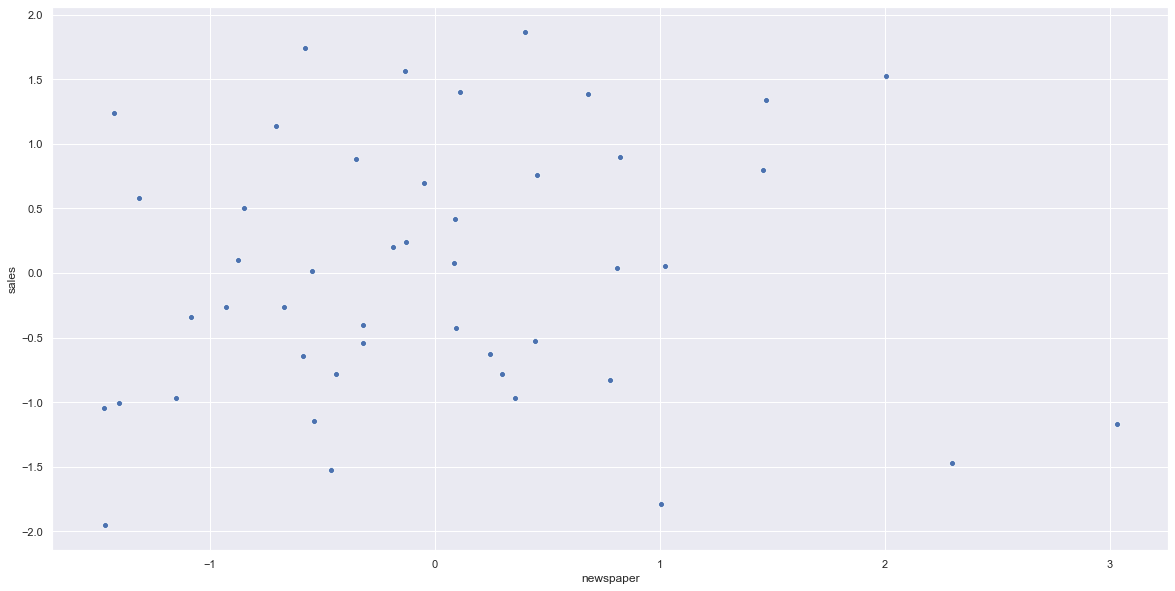

In [782]:
sns.scatterplot(data=df2_train,x='newspaper',y='sales') # Plotting the standard scaled data of df2

In [783]:
x_train = df2_train["newspaper"].values.reshape(-1,1)  # Reshaping the training set
y_train = df2_train["sales"]     # Saving data of sales 
reg = LinearRegression()    # Trainig model
reg.fit(x_train,y_train)                     # Linear regression
y_pred_train = reg.predict(x_train)          # Making prediction
y_pred_train

array([-0.01388886,  0.15160611, -0.06623146,  0.05885195,  0.1104248 ,
       -0.06430709, -0.03313246, -0.0242804 , -0.0242804 ,  0.01844039,
       -0.10779763, -0.08701454, -0.04429375,  0.07617119,  0.17392869,
       -0.00965527,  0.07732581, -0.05353068, -0.07008018,  0.05153938,
        0.11119455, -0.11126148,  0.00689423,  0.03037142,  0.03422014,
       -0.00349732, -0.09933045, -0.01004014,  0.06116118,  0.02267398,
       -0.11087661, -0.04121477, -0.02658964,  0.00843372, -0.04044503,
        0.03383527, -0.08201121,  0.00650936, -0.05083657, -0.04352401,
       -0.03505682, -0.10625815,  0.0072791 ,  0.22935026,  0.0623158 ,
        0.02690757])

In [784]:
# For training data set of df2

print("R2_score of Training set = ", r2_score(y_train,y_pred_train).round(2))    # Checking r2 score between actual and predicted
rss = np.sum(np.square(y_train - y_pred_train))                 #  Residual sum of square 
print("Residual sum of square of Training set", rss.round(2))
mse = mean_squared_error(y_train, y_pred_train)   # Mean squared error
print("Mean square error of Training set", mse.round(2))
rmse = mse**0.5   # Root mean square error
print("Root Mean square error of Training set", rmse.round(2))

R2_score of Training set =  0.01
Residual sum of square of Training set 45.74
Mean square error of Training set 0.99
Root Mean square error of Training set 1.0


In [785]:
accuracy = reg.score(x_train,y_train).round(2) # Accuracy of the training data set
print("Accuracy of the training data set of df2:",accuracy*100,'%')

Accuracy of the training data set of df2: 1.0 %


For Cross-Validation set

In [786]:
df2_val = scaler.fit_transform(val_df2)   # Scaling the cross validation data set 

In [787]:
df2_val = pd.DataFrame(df2_val, columns = col2)   # Making a data frame of the scaled data with previous columns name

In [788]:
df2_val.shape  # Shape of the cross validation data set

(16, 2)

In [789]:
df2_val.head() # Printing first 5 values of the data set

,newspaper,sales
0,-0.137219,1.629071
1,-0.968286,-0.333219
2,-0.174431,0.610902
3,-1.017902,-0.758999
4,-0.682995,-0.166610


In [746]:
# For cross validation data set of df2

x_val = df2_val['newspaper'].values.reshape(-1,1)  # Reshaping the data set
y_val = df2_val["sales"]     # Saving data of sales
reg = LinearRegression()         
reg.fit(x_val,y_val)                     # Linear regression 
y_pred_val = reg.predict(x_val)          # Making prediction
y_pred_val    # Printing prediction

array([-0.02486446, -0.17545601, -0.03160737, -0.18444655, -0.1237604 ,
        0.11598733,  0.17217821,  0.07852675, -0.09678878, -0.01587392,
       -0.2451327 , -0.01137865,  0.09650783,  0.53254902, -0.16122099,
        0.07478069])

In [747]:
# For Cross-Valdiation data set of df2

print("R2_score of Cross-Validation set = ", r2_score(y_val,y_pred_val).round(2))    # Checking r2 score between actual and predicted
rss = np.sum(np.square(y_val - y_pred_val))                 #  Residual sum of square 
print("Residual sum of square of Cross-Validation set", rss.round(2))
mse = mean_squared_error(y_val, y_pred_val)   # Mean squared error
print("Mean square error of Cross-Validation set", mse.round(2))
rmse = mse**0.5   # Root mean square error
print("Root Mean square error of Cross-Valdiation set", rmse.round(2))

R2_score of Cross-Validation set =  0.03
Residual sum of square of Cross-Validation set 15.47
Mean square error of Cross-Validation set 0.97
Root Mean square error of Cross-Valdiation set 0.98


In [748]:
accuracy = reg.score(x_val,y_val).round(2) # Accuracy of the data set
print("Accuracy of the Cross-Validation data set of df2:",accuracy*100,'%')

Accuracy of the Cross-Validation data set of df2: 3.0 %


For Testing set

In [749]:
df2_test = scaler.fit_transform(test_df2)   # Scaling the data set 

In [750]:
df2_test = pd.DataFrame(df2_test, columns = col2)   # Making a data frame of the scaled data with previous columns name

In [751]:
df2_test.shape  # Shape of the data set

(16, 2)

In [752]:
df2_test.head() # Printing first 5 values of the data set

,newspaper,sales
0,-0.661635,0.694413
1,-0.510404,-0.139770
2,0.864852,-1.151439
3,-0.099245,0.161956
4,-0.784511,-0.175267


In [790]:
# For cross validation data set of df2   

x_test = df2_test['newspaper'].values.reshape(-1,1)  # Reshaping the data set
y_test = df2_test["sales"]     # Saving data of sales
reg = LinearRegression()         
reg.fit(x_test,y_test)                     # Linear regression 
y_pred_test = reg.predict(x_test)          # Making prediction
y_pred_test    # Printing prediction

array([ 0.00915014,  0.00705868, -0.01196054,  0.00137252,  0.01084945,
       -0.00411756, -0.01941136, -0.02287534,  0.01398664,  0.01150303,
       -0.00660117,  0.01614346,  0.00052287,  0.01026123,  0.01307163,
       -0.02895365])

In [791]:
# For testing data set of df2

print("R2_score of Testing set = ", r2_score(y_test,y_pred_test).round(2))    # Checking r2 score between actual and predicted
rss = np.sum(np.square(y_test - y_pred_test))                 #  Residual sum of square 
print("Residual sum of square of Testing set", rss.round(2))
mse = mean_squared_error(y_test, y_pred_test)   # Mean squared error
print("Mean square error of Testing set", mse.round(2))
rmse = mse**0.5   # Root mean square error
print("Root Mean square error of Testing set", rmse.round(2))

R2_score of Testing set =  0.0
Residual sum of square of Testing set 16.0
Mean square error of Testing set 1.0
Root Mean square error of Testing set 1.0


In [792]:
accuracy = reg.score(x_test,y_test).round(2) # Accuracy of the training data set
print("Accuracy of the testing data set of df2:",accuracy*100,'%')

Accuracy of the testing data set of df2: 0.0 %


# Conclusion: -
1. 'newspaper' and 'sales' has lowest correlation.
2. Accuracy in Training set and Cross-Validation data set is less than 5% or nearly equal to 1%.
3. Accuracy of Testing data set is 0.
4. So, we can say that we cannot train this model further because it has lowest correlation and also accuracy is very low,
   and not in the acceptable range.
5. And hence, we can drop 'newspaper' column.

# For data frame df3 with 'radio' and 'sales' column

In [795]:
col3 = df3.columns  # Columns of the previous data set

In [796]:
temp_df3, test_df3 = train_test_split(df3, test_size = 0.2,random_state=0) # Splitting data into temporary and testing set

In [802]:
train_df3, val_df3 = train_test_split(temp_df3, test_size = 0.25,random_state=0) 
# Using temporary data set to split data into training and cross-validation set

In [803]:
print(train_df3.shape)
print(test_df3.shape)
print(val_df3.shape)

(46, 2)
(16, 2)
(16, 2)


For Training set

In [804]:
df3_train = scaler.fit_transform(train_df3)   # Scaling the data set 

In [805]:
df3_train = pd.DataFrame(df3_train, columns = col3)   # Making a data frame of the scaled data with previous columns name

In [806]:
df3_train.head()

,radio,sales
0,0.082392,-1.180309
1,-1.538080,-0.977993
2,0.269884,-0.131945
3,-0.680971,-0.463007
4,1.682775,1.633721


In [807]:
x_train1 = df3_train["radio"].values.reshape(-1,1)  # Reshaping the training set
y_train1 = df3_train["sales"]     # Saving data of sales 
reg = LinearRegression()    # Trainig model
reg.fit(x_train1,y_train1)                     # Linear regression
y_pred_train1 = reg.predict(x_train1)          # Making prediction
y_pred_train1

array([ 0.05601771, -1.04572988,  0.18349264, -0.46298736,  1.14410728,
       -0.84996482, -0.02593046, -0.67696313,  0.13796588, -0.99565045,
        0.11975517, -0.453882  ,  0.38381038, -0.62233102,  0.10154447,
        0.83452531, -0.20348482, -0.97288707,  0.88005207,  0.19715067,
        1.13500192, -1.0229665 , -1.04117721,  0.78444587, -0.76801665,
       -0.6633051 , -0.88183355,  1.05760643, -0.39014454,  0.37925771,
        0.77534052, -0.73159524,  0.40657376, -0.3218544 ,  0.60689151,
        0.60233883, -0.34461778, -0.02137778,  0.68883967,  1.11223854,
        0.00593827,  0.21991405,  0.76623517,  0.48396925, -0.95467636,
        0.38836306])

In [808]:
# For training data set of df3

print("R2_score of Training set = ", r2_score(y_train1,y_pred_train1).round(2))    # Checking r2 score between actual and predicted
rss = np.sum(np.square(y_train1 - y_pred_train1))                 #  Residual sum of square 
print("Residual sum of square of Training set", rss.round(2))
mse = mean_squared_error(y_train1, y_pred_train1)   # Mean squared error
print("Mean square error of Training set", mse.round(2))
rmse = mse**0.5   # Root mean square error
print("Root Mean square error of Training set", rmse.round(2))

R2_score of Training set =  0.46
Residual sum of square of Training set 24.74
Mean square error of Training set 0.54
Root Mean square error of Training set 0.73


In [809]:
accuracy = reg.score(x_train1,y_train1).round(3) # Accuracy of the training data set
print("Accuracy of the training data set of df3:",accuracy*100,'%')

Accuracy of the training data set of df3: 46.2 %


For Cross-Validation data

In [810]:
df3_val = scaler.fit_transform(val_df3)   # Scaling the data set 

In [811]:
df3_val = pd.DataFrame(df3_val, columns = col3)   # Making a data frame of the scaled data with previous columns name

In [812]:
df3_val.head()

,radio,sales
0,1.459574,1.442151
1,-0.669210,-0.650190
2,-0.908875,-0.806627
3,1.685141,0.171103
4,-1.141490,-0.884845


In [813]:
x_val1 = df3_val["radio"].values.reshape(-1,1)  # Reshaping the cross-validation set
y_val1 = df3_val["sales"]     # Saving data of sales 
reg = LinearRegression()    # Trainig model
reg.fit(x_val1,y_val1)                     # Linear regression
y_pred_val1 = reg.predict(x_val1)          # Making prediction
y_pred_val1

array([ 0.93563475, -0.42898557, -0.58261832,  1.08023027, -0.73173246,
       -0.2256481 ,  0.77748338, -1.0570724 , -0.26631559,  0.09969184,
        0.62385063,  0.09969184,  0.18102683,  0.50184816, -0.04038508,
       -0.96670019])

In [814]:
# For Cross-Validation data set of df3

print("R2_score of cross-validation set = ", r2_score(y_val1,y_pred_val1).round(2))    # Checking r2 score between actual and predicted
rss = np.sum(np.square(y_val1 - y_pred_val1))                 #  Residual sum of square 
print("Residual sum of square of cross-validation set", rss.round(2))
mse = mean_squared_error(y_val1, y_pred_val1)   # Mean squared error
print("Mean square error of cross-validation set", mse.round(2))
rmse = mse**0.5   # Root mean square error
print("Root Mean square error of cross-validation set", rmse.round(2))

R2_score of cross-validation set =  0.41
Residual sum of square of cross-validation set 9.43
Mean square error of cross-validation set 0.59
Root Mean square error of cross-validation set 0.77


In [815]:
accuracy = reg.score(x_val1,y_val1).round(2) # Accuracy of the cross-validation data set
print("Accuracy of the cross-validation data set of df3:",accuracy*100,'%')

Accuracy of the cross-validation data set of df3: 41.0 %


For Testing data

In [816]:
df3_test = scaler.fit_transform(test_df3)   # Scaling the data set 

In [817]:
df3_test = pd.DataFrame(df3_test, columns = col3)   # Making a data frame of the scaled data with previous columns name

In [818]:
df3_test.head()

,radio,sales
0,-0.951298,-0.906894
1,-0.558403,0.464507
2,0.353115,1.681072
3,0.455268,0.044239
4,-0.102644,0.243313


In [819]:
x_test1 = df3_test["radio"].values.reshape(-1,1)  # Reshaping the testing set
y_test1 = df3_test["sales"]     # Saving data of sales 
reg = LinearRegression()    # Trainig model
reg.fit(x_test1,y_test1)                     # Linear regression
y_pred_test1 = reg.predict(x_test1)          # Making prediction
y_pred_test1

array([-0.16042803, -0.09416968,  0.05954969,  0.07677686, -0.01730999,
        0.26627574, -0.23993805,  0.26362541, -0.10609618, -0.0610405 ,
       -0.01996033, -0.11007168,  0.29277908,  0.09002853,  0.05689936,
       -0.29692023])

In [820]:
# For testing data set of df3

print("R2_score of Testing data set = ", r2_score(y_test1,y_pred_test1).round(2))    # Checking r2 score between actual and predicted
rss = np.sum(np.square(y_test1 - y_pred_test1))                 #  Residual sum of square 
print("Residual sum of square of testing data set", rss.round(2))
mse = mean_squared_error(y_test1, y_pred_test1)   # Mean squared error
print("Mean square error of testing data set", mse.round(2))
rmse = mse**0.5   # Root mean square error
print("Root Mean square error of testing data set", rmse.round(2))

R2_score of Testing data set =  0.03
Residual sum of square of testing data set 15.54
Mean square error of testing data set 0.97
Root Mean square error of testing data set 0.99


In [821]:
accuracy = reg.score(x_test1,y_test1).round(2) # Accuracy of the testing data set
print("Accuracy of the Testing data set of df3:",accuracy*100,'%')

Accuracy of the Testing data set of df3: 3.0 %


In [840]:
x_df = scaler.fit_transform(df3)   # Scaling the main data set 

In [841]:
x_df = pd.DataFrame(x_df, columns = col3)   # Making a data frame of the scaled data with previous columns name

In [842]:
x_df.head()

,radio,sales
0,0.922879,1.461803
1,1.027305,-0.778025
2,1.486781,-0.988607
3,1.166540,0.772625
4,-0.956795,-0.299429


In [848]:
x_1 = x_df["radio"].values.reshape(-1,1)  # Reshaping the main data set
y_1 = x_df["sales"]

From above observations we can say that the model is overfit as the accuracy of training data set is greater than 
accuracy of cross-validation data set.
So, to overcome this problem we will use  regularization (L1 (lasso) and L2 (Ridge))

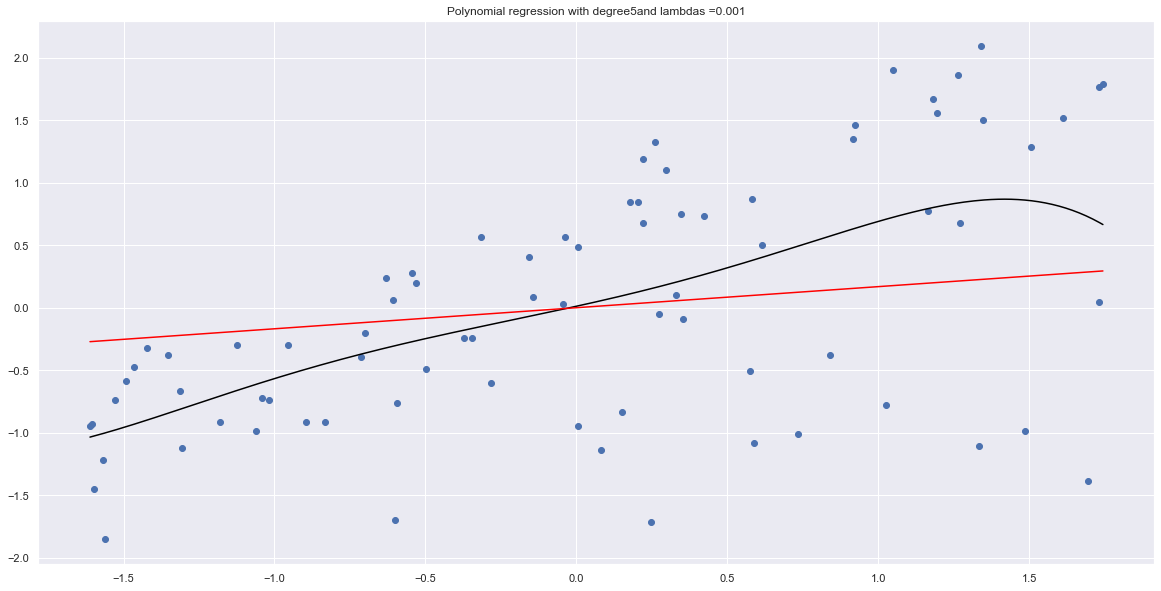

r2 score:0.35371923707540176
Intercept: 0.011628535767585532
Coefficients: [ 0.          0.53329962  0.11196775  0.14629261 -0.06197809 -0.05075858]
**************************************************************************************


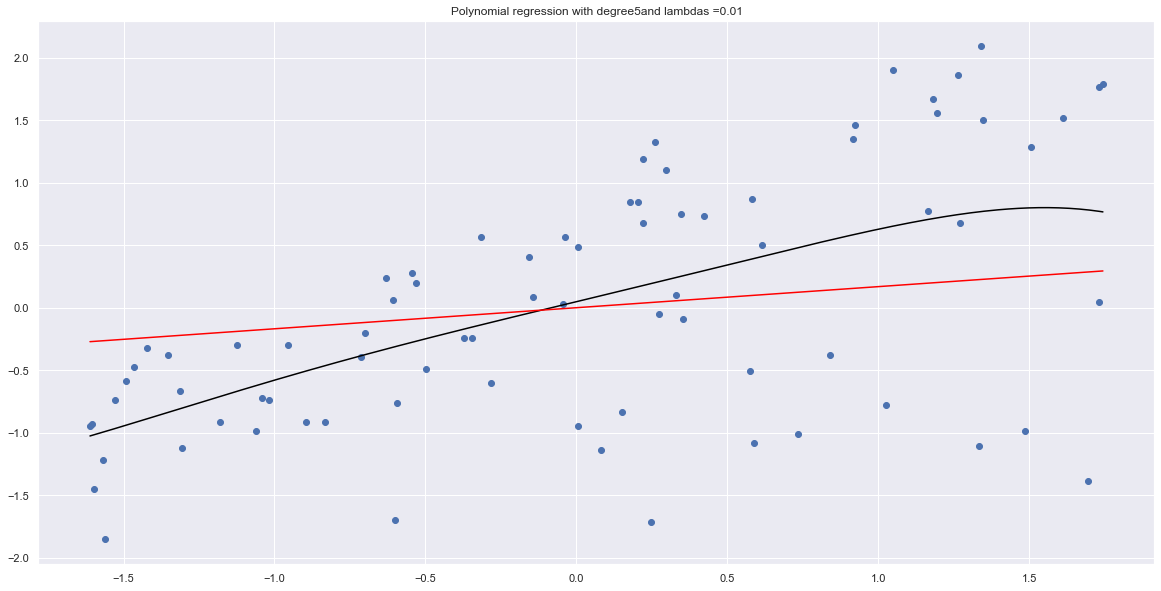

r2 score:0.3513290710659178
Intercept: 0.04819710343743359
Coefficients: [ 0.          0.58284786  0.          0.03823781 -0.02409666 -0.017211  ]
**************************************************************************************


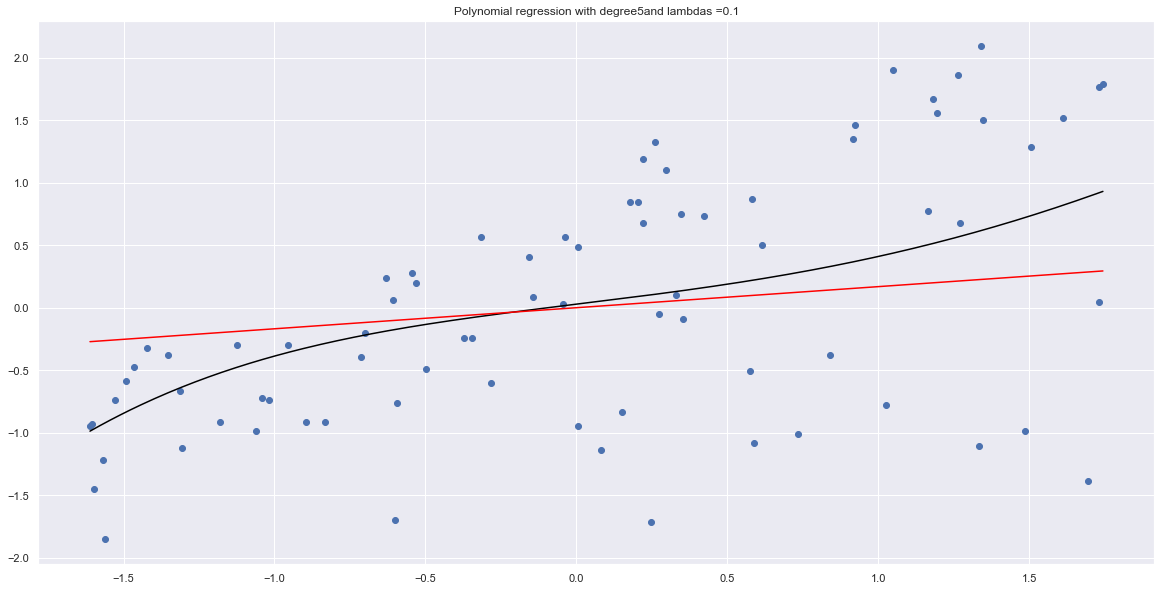

r2 score:0.32730438064193323
Intercept: 0.02809736498080281
Coefficients: [ 0.          0.29687571 -0.          0.1016333  -0.01669575  0.        ]
**************************************************************************************


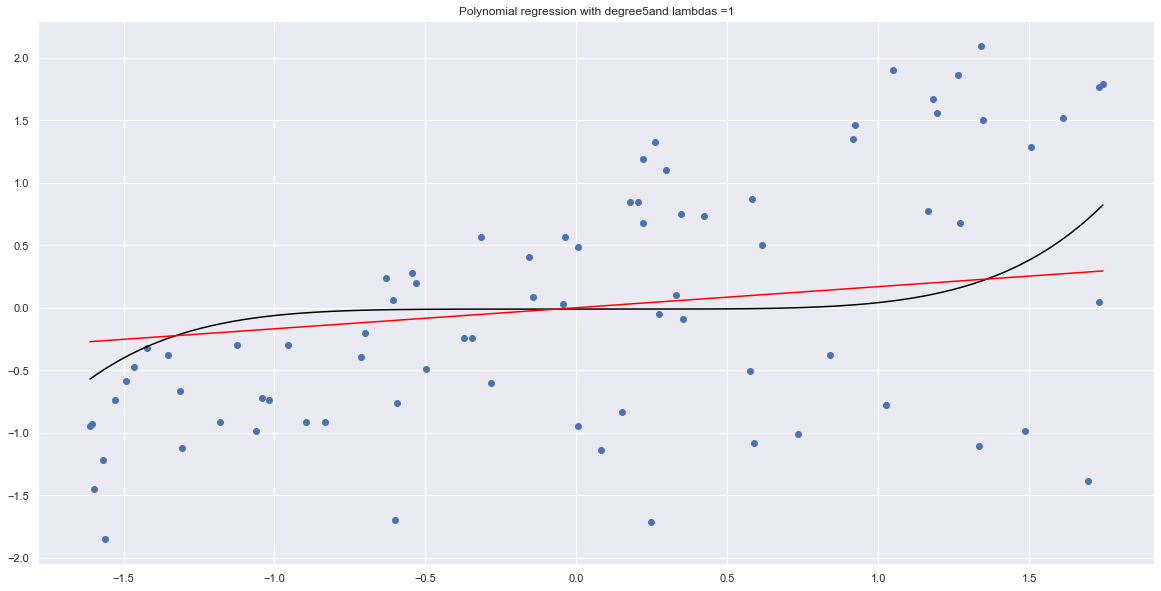

r2 score:0.1731646248460038
Intercept: -0.011016325069954475
Coefficients: [ 0.          0.         -0.          0.         -0.          0.05160344]
**************************************************************************************


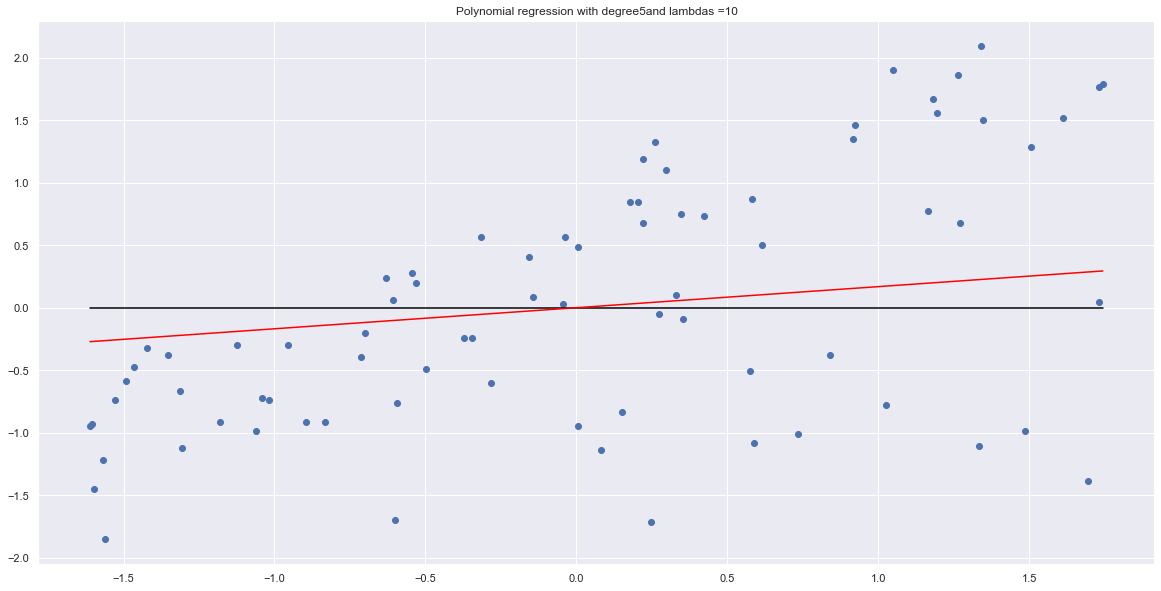

r2 score:0.0
Intercept: -7.2716049705817545e-16
Coefficients: [ 0.  0. -0.  0. -0.  0.]
**************************************************************************************


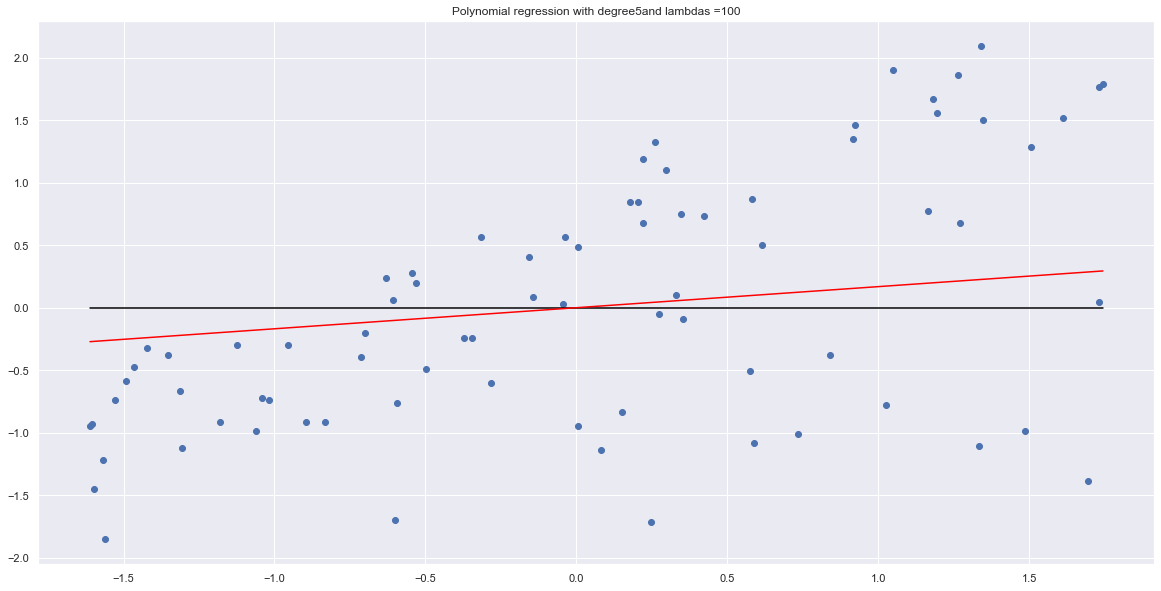

r2 score:0.0
Intercept: -7.2716049705817545e-16
Coefficients: [ 0.  0. -0.  0. -0.  0.]
**************************************************************************************


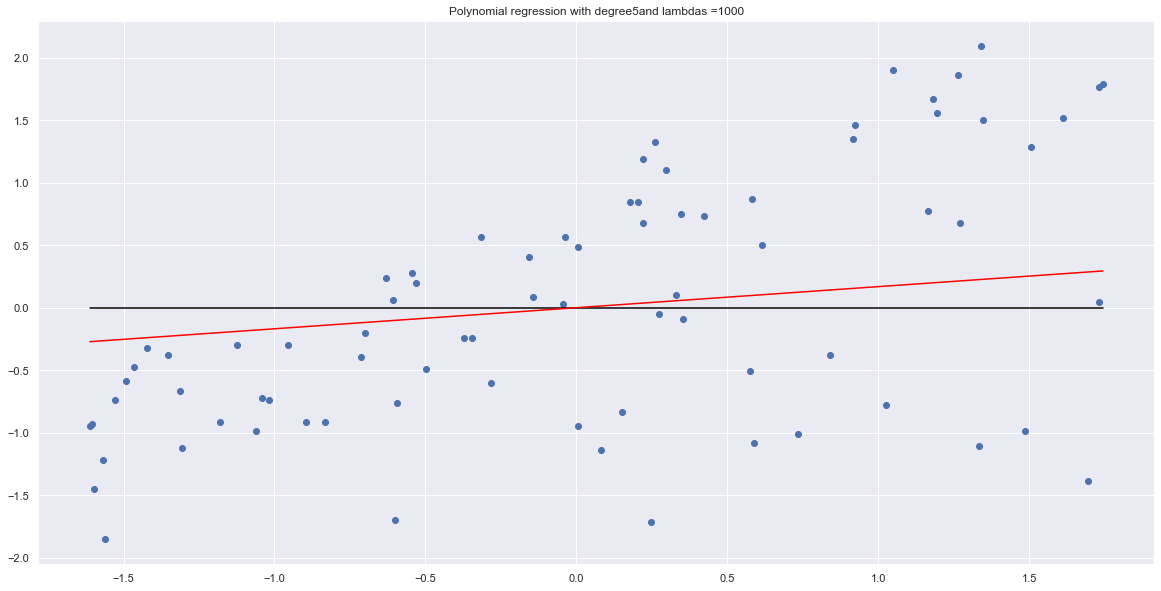

r2 score:0.0
Intercept: -7.2716049705817545e-16
Coefficients: [ 0.  0. -0.  0. -0.  0.]
**************************************************************************************


In [849]:
# L1 regularization or Lasso regularization 

X_seq = np.linspace(x_1.min(),x_1.max(),300).reshape(-1,1)
lambdas = [0.001,0.01,0.1,1,10,100,1000]
for i in lambdas:
    degree =5
    lassocoef = PolynomialFeatures(degree)
    x3_poly = lassocoef.fit_transform(x_1)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(x3_poly,y_1)
    plt.figure()
    plt.scatter(x_1,y_1)
    plt.plot(X_seq,lassoreg.predict(lassocoef.fit_transform(X_seq)),color = 'black')
    plt.plot(X_seq,reg.predict(X_seq),color='red')
    plt.title("Polynomial regression with degree"+str(degree)+"and lambdas ="+str(i))
    plt.show()
    y_pred_df3 = lassoreg.predict(lassocoef.fit_transform(x_1))
    print("r2 score:"+ str(r2_score(y_1,y_pred_df3)))
    print("Intercept:",lassoreg.intercept_)
    print("Coefficients:",lassoreg.coef_)
    print("**************************************************************************************")

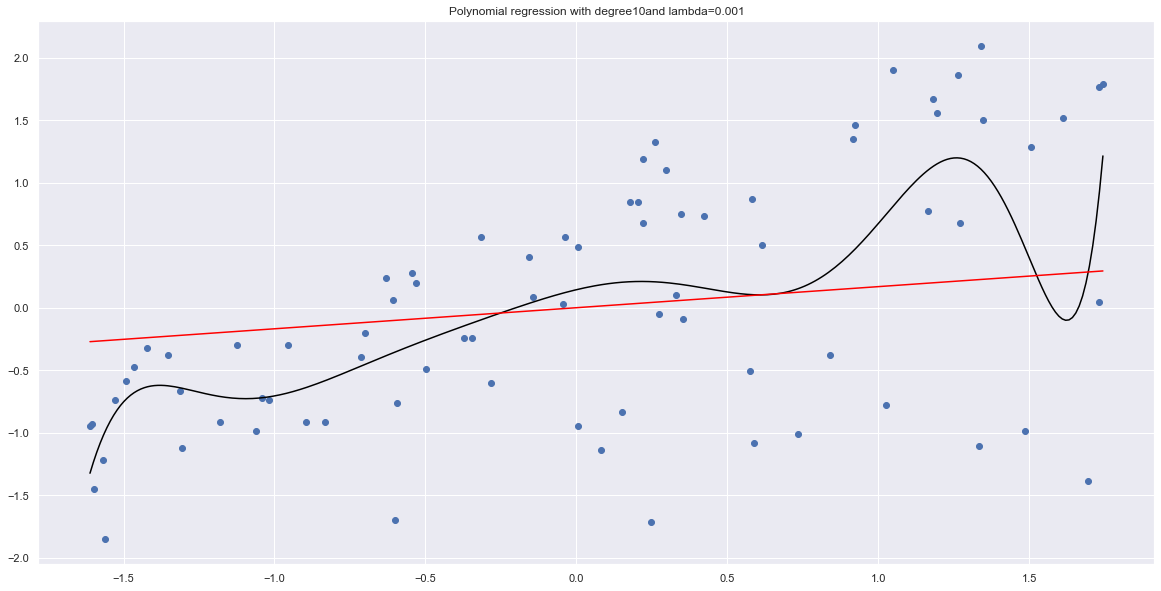

r2_score     :0.4043956519364662
Intercept    : 0.1440381854630403
Coefficients : [ 0.          0.57570191 -0.99566454 -1.40354995  0.36669717  3.01042118
  1.16575537 -1.82588288 -0.84287515  0.33261373  0.14543439]
***************************************************************************************


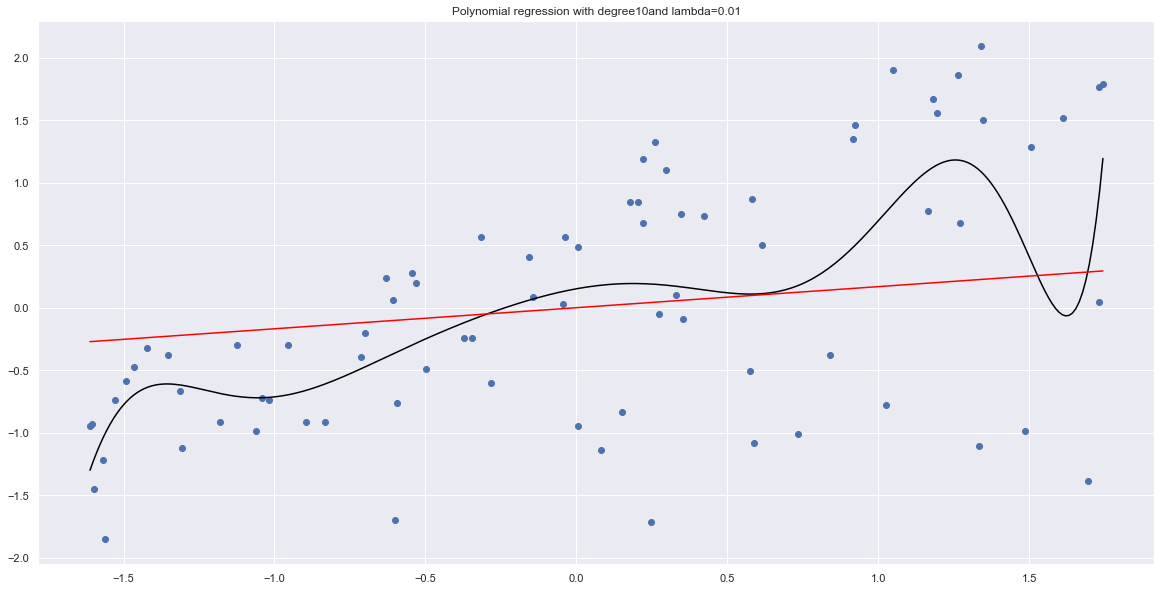

r2_score     :0.4039626666888241
Intercept    : 0.1513823222500214
Coefficients : [ 0.          0.43798712 -1.02812452 -0.72056108  0.39620466  2.11798941
  1.20141323 -1.39351934 -0.88594392  0.26255518  0.15594578]
***************************************************************************************


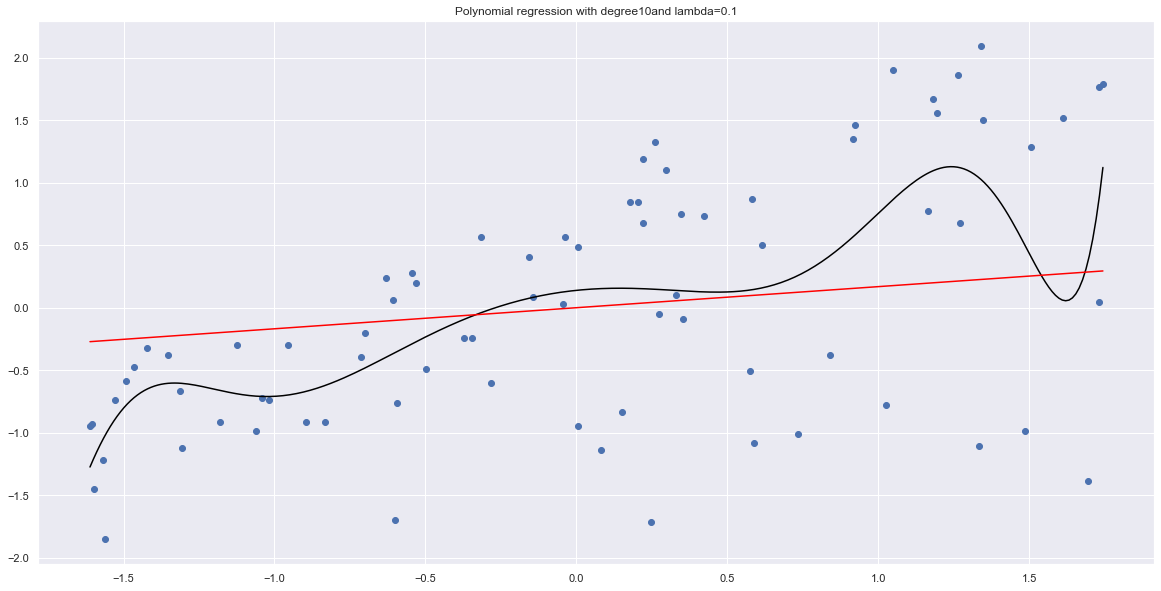

r2_score     :0.40118567967799323
Intercept    : 0.13885792152645332
Coefficients : [ 0.          0.247968   -0.95548834  0.30288795  0.55625259  0.76772905
  0.88096444 -0.74653528 -0.73188036  0.1599994   0.13411774]
***************************************************************************************


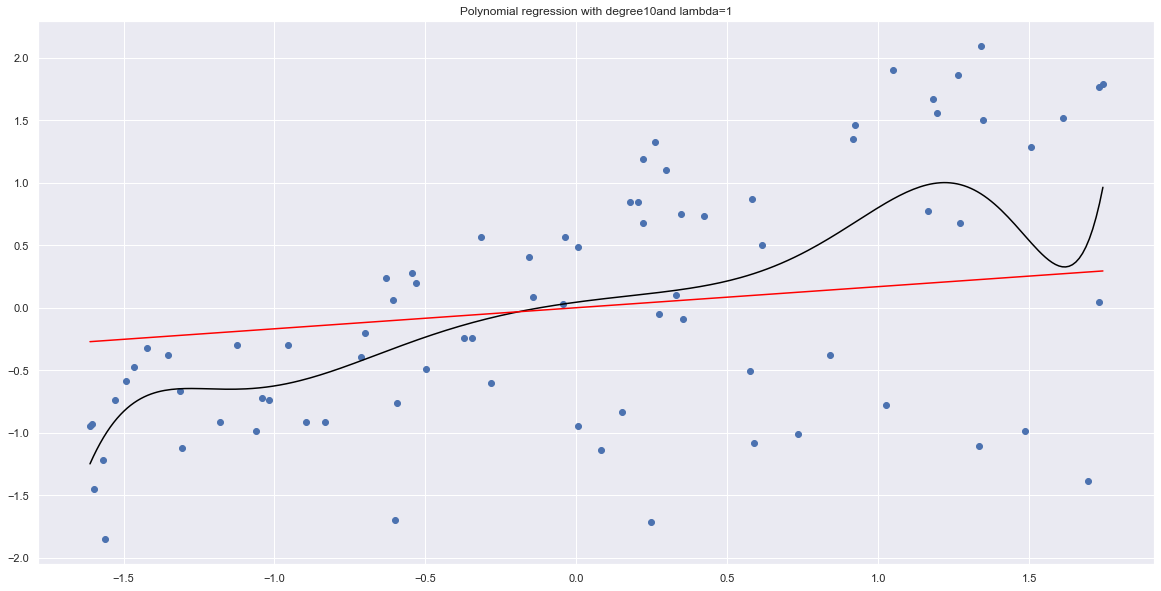

r2_score     :0.38851442935119884
Intercept    : 0.044263678687131706
Coefficients : [ 0.          0.32599446 -0.30459789  0.45251658  0.27408902  0.25103479
  0.32295186 -0.41741781 -0.30570887  0.10127187  0.0565921 ]
***************************************************************************************


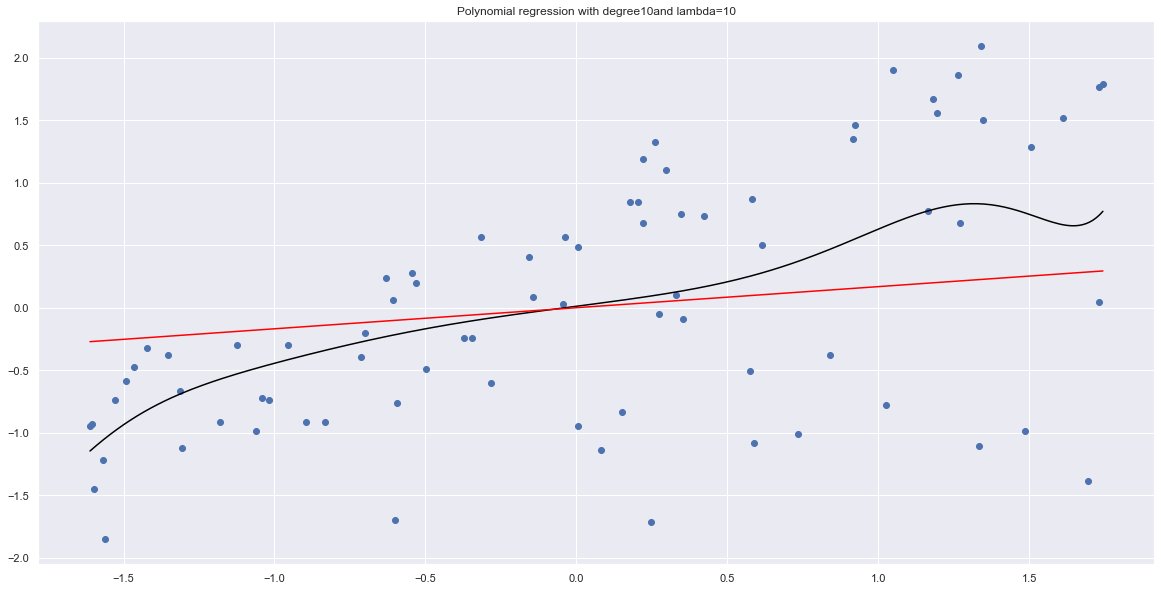

r2_score     :0.36097415093549035
Intercept    : 0.011568988018348653
Coefficients : [ 0.          0.31494256  0.00593903  0.22832138  0.08702155  0.08838164
  0.05955291 -0.12091908 -0.09095839  0.02585362  0.01895204]
***************************************************************************************


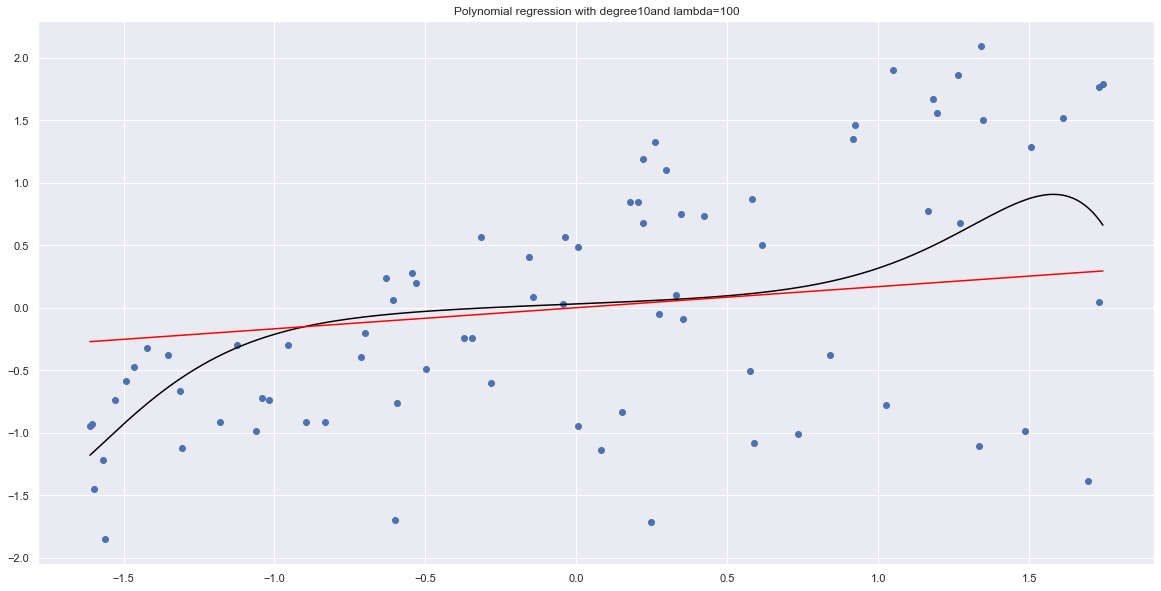

r2_score     :0.30153448760916945
Intercept    : 0.03040729471358256
Coefficients : [ 0.          0.09900513  0.00635612  0.08332835  0.01567793  0.06649493
  0.01024808  0.02949323 -0.01145145 -0.01395263  0.00041043]
***************************************************************************************


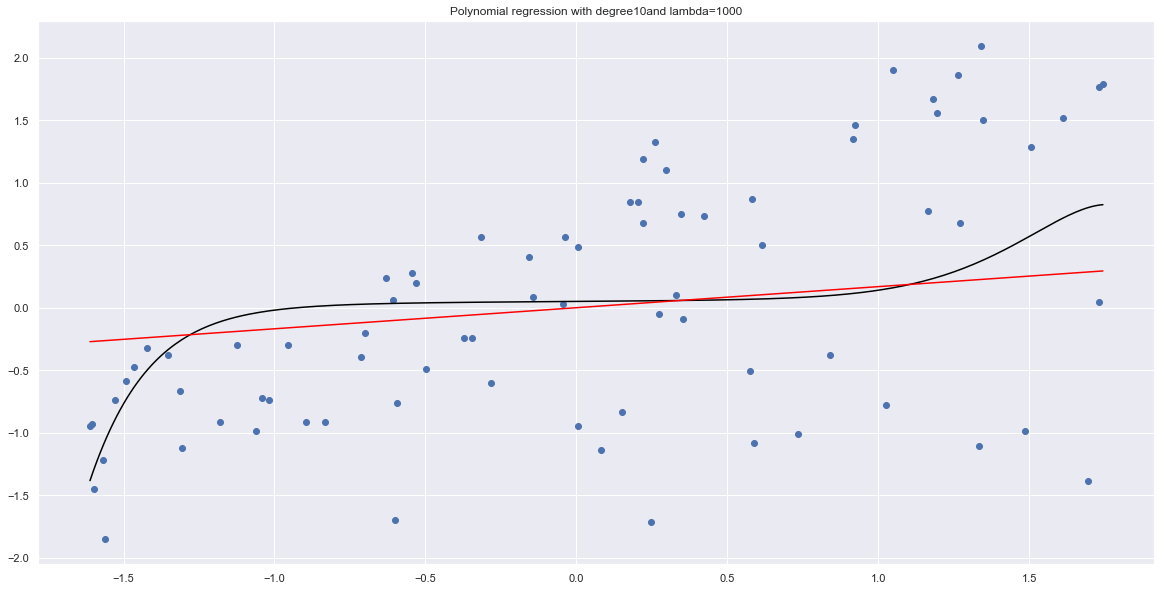

r2_score     :0.23064353830900886
Intercept    : 0.05031553956979375
Coefficients : [ 0.          0.01802281  0.0020446   0.01904508  0.00441505  0.02105079
  0.00560582  0.01910235  0.00364072  0.00238144 -0.00578985]
***************************************************************************************


In [851]:
# L2 regularization or Ridge regularization

X3_seq = np.linspace(x_1.min(),x_1.max(),300).reshape(-1,1)
lambdas = [0.001,0.01,0.1,1,10,100,1000]
for i in lambdas:
    degree = 10
    ridgecoef = PolynomialFeatures(degree)
    X_poly = ridgecoef.fit_transform(x_1)
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_poly,y_1)
    plt.figure()
    plt.scatter(x_1,y_1)
    plt.plot(X3_seq,ridgereg.predict(ridgecoef.fit_transform(X3_seq)),color = 'black')
    plt.plot(X3_seq, reg.predict(X3_seq), color ='red')
    plt.title("Polynomial regression with degree"+str(degree)+"and lambda="+str(i))
    plt.show()
    y_pred3 = ridgereg.predict(ridgecoef.fit_transform(x_1))
    print("r2_score     :"+str(r2_score(y_1,y_pred3)))
    print("Intercept    :",ridgereg.intercept_)
    print("Coefficients :",ridgereg.coef_)
    print("***************************************************************************************")

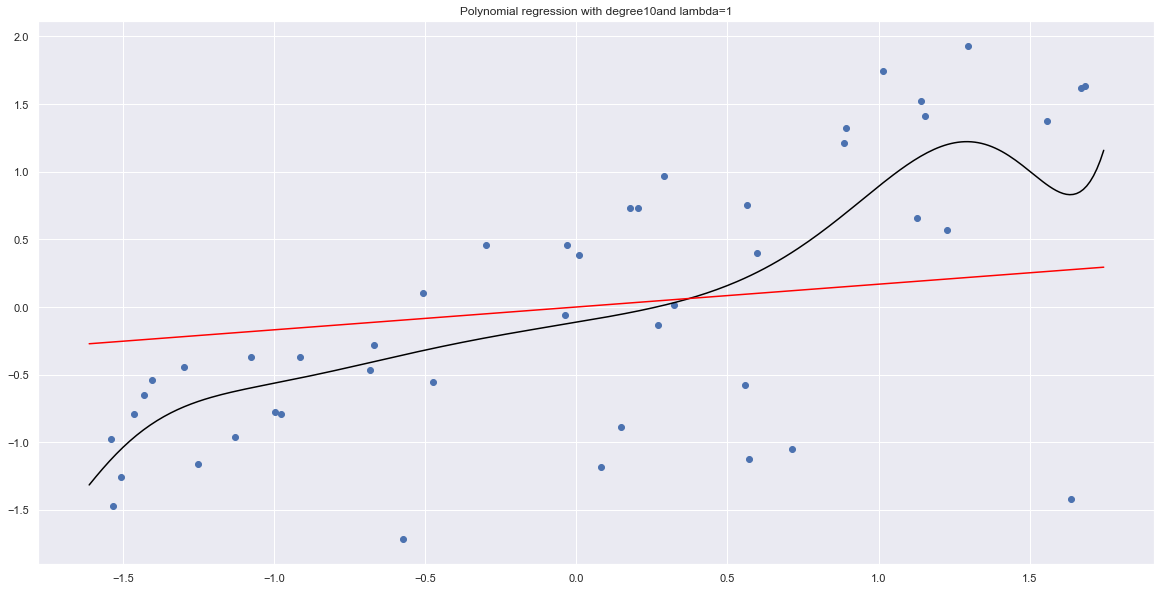

r2_score     :0.52
Intercept    : -0.11250679370728779
Coefficients : [ 0.          0.37598819  0.0639754   0.38226675  0.24599587  0.14637232
  0.13056698 -0.22715243 -0.20810767  0.05036562  0.04425101]
Accuracy     : 52.0 %
***************************************************************************************


In [890]:
# For training set of data frame of df3

degree = 10
ridgecoef = PolynomialFeatures(degree)
X_poly = ridgecoef.fit_transform(x_train1)
ridgereg = Ridge(alpha = 2.5)
ridgereg.fit(X_poly,y_train1)
plt.figure()
plt.scatter(x_train1,y_train1)
plt.plot(X3_seq,ridgereg.predict(ridgecoef.fit_transform(X3_seq)),color = 'black')
plt.plot(X3_seq, reg.predict(X3_seq), color ='red')
plt.title("Polynomial regression with degree"+str(degree)+"and lambda="+str(1))
plt.show()
y_pred3 = ridgereg.predict(ridgecoef.fit_transform(x_train1))
print("r2_score     :"+str(r2_score(y_train1,y_pred3).round(2)))
print("Intercept    :",ridgereg.intercept_)
print("Coefficients :",ridgereg.coef_)
print("Accuracy     :",r2_score(y_train1,y_pred3).round(2)*100,"%")
print("***************************************************************************************")

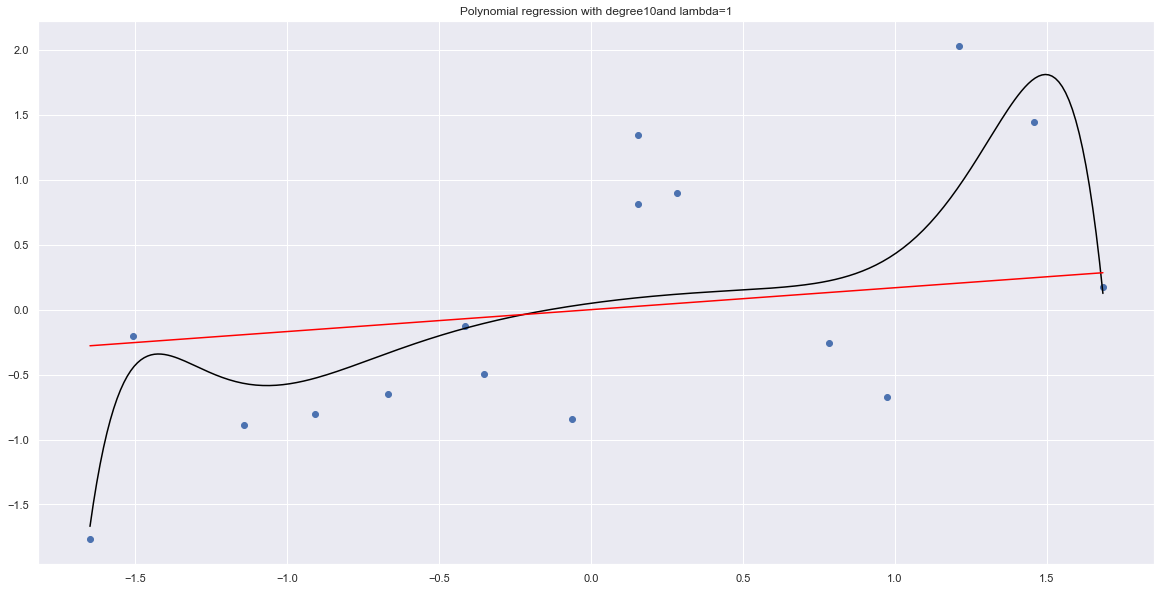

r2_score     :0.59
Intercept    : 0.04898391151058519
Coefficients : [ 0.          0.320263   -0.28869939  0.1113912  -0.07167611  0.08774441
  0.12378528 -0.01420363  0.1996352  -0.00420604 -0.08447347]
Accuracy     : 59.0 %
***************************************************************************************


In [889]:
# For cross validation set of data frame of df3

X1_seq = np.linspace(x_val1.min(),x_val1.max(),300).reshape(-1,1)
degree = 10
ridgecoef = PolynomialFeatures(degree)
X_poly = ridgecoef.fit_transform(x_val1)
ridgereg = Ridge(alpha = 2.5)
ridgereg.fit(X_poly,y_val1)
plt.figure()
plt.scatter(x_val1,y_val1)
plt.plot(X1_seq,ridgereg.predict(ridgecoef.fit_transform(X1_seq)),color = 'black')
plt.plot(X1_seq, reg.predict(X1_seq), color ='red')
plt.title("Polynomial regression with degree"+str(degree)+"and lambda="+str(1))
plt.show()
y_pred3 = ridgereg.predict(ridgecoef.fit_transform(x_val1))
print("r2_score     :"+str(r2_score(y_val1,y_pred3).round(2)))
print("Intercept    :",ridgereg.intercept_)
print("Coefficients :",ridgereg.coef_)
print("Accuracy     :",r2_score(y_val1,y_pred3).round(2)*100,"%")
print("***************************************************************************************")

# Conclusion
1. By changing values of lambda in range of 0.001 to 100, we can say that the r2_score or accuracy of the model increases but,
   the difference between the accuracy of training set and cross-validation set also increases.
2. And assuming the minimum range of accuracy to be near about 50%.
3. At lambda = 2.5, the difference of accuracy of training and cross-validation model is minimum near about 7%.
   also, the accuracy of both training and cross-validation set is greater than 50%.
4. And, we can say that at this point the model is best-fit.

In [892]:
# Feature selection

X,y = df.drop(columns=['sales']),df['sales']
estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X,y)
print("Rank of features : ",selector.ranking_)
print("Selected Features : \n", pd.Series(df.drop(columns = ['sales']).columns)[selector.support_])

Rank of features :  [1 1 1]
Selected Features : 
 0           TV
1        radio
2    newspaper
dtype: object


# Result:
From above data sets and training models we can say that,
1. Model-1, containing 'TV' and 'sales' is best-fit and has best correlation.
2. Model-2, containing 'newspaper' and 'sales' has worst correlation and also the model has least accuracy which
   is not in the acceptable range (below 5%). Hence, we can drop 'newspaper' column.
3. Model-3, containing 'radio' and 'sales' after training the model, found out to be an overfit model,
   So, to overcome this problem we use regularization and after doing that we have achieved a best-fit model,
   which has accuracy in an acceptable range (assuming accuracy above 50% to be acceptable).
4. After doing feature selection we can observe that, 'TV' and 'radio' is best choice for model prediction and hence, we can      drop 'newspaper' column.
5. Now, we left with only two independent variables ('TV' and 'sales') and one dependent variable ('sales').

***